In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import pickle

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from scipy.stats import boxcox, normaltest
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn import preprocessing
import numpy as np
from scipy import special, stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/codess/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Load data
udemy_df = pd.read_pickle("udemy_cleaned_df.pkl") #986 records

In [3]:
df = udemy_df.drop(columns=['Title','Level','URL'])

In [4]:
df.head(2)

,Lectures,Hours,Sale,Price,Stars,Number of Ratings,Enrollment,Incentives,,All Levels,Beginner,Expert,Intermediate
0,61,11.5,10.99,19.99,4.7,12,76,6,0,0,1,0,0
1,24,2.5,10.99,49.99,4.4,18,84,5,0,0,0,0,1


In [5]:
df=df.rename(columns={'':'No Level'})

In [6]:
df.head(2)

,Lectures,Hours,Sale,Price,Stars,Number of Ratings,Enrollment,Incentives,No Level,All Levels,Beginner,Expert,Intermediate
0,61,11.5,10.99,19.99,4.7,12,76,6,0,0,1,0,0
1,24,2.5,10.99,49.99,4.4,18,84,5,0,0,0,0,1


##### RENAME:

- Y = Enrollment
- X1 = Lectures
- X2 = Hours
- X3 = Sale
- X4 = Price
- X5 = Stars
- X6 = Number of Ratings
- X7 = Incentives
- X8 = No Level
- X9 = All Levels
- X10 = Beginner
- X11 = Expert
- X12 = Intermediate

In [7]:
df=df.rename(columns={'Enrollment':'Y' ,'Lectures':'X1','Hours':'X2','Sale':'X3','Price':'X4','Stars':'X5', 'Number of Ratings':'X6','Incentives':'X7','No Level':'X8','All Levels':'X9','Beginner':'X10','Expert':'X11','Intermediate':'X12' })

In [8]:
df.head(2)

,X1,X2,X3,X4,X5,X6,Y,X7,X8,X9,X10,X11,X12
0,61,11.5,10.99,19.99,4.7,12,76,6,0,0,1,0,0
1,24,2.5,10.99,49.99,4.4,18,84,5,0,0,0,0,1


In [9]:
df.to_pickle('udemy_regression_df.pkl')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 1286
Data columns (total 13 columns):
X1     986 non-null int64
X2     986 non-null float64
X3     986 non-null float64
X4     986 non-null float64
X5     986 non-null float64
X6     986 non-null int64
Y      986 non-null int64
X7     986 non-null int64
X8     986 non-null uint8
X9     986 non-null uint8
X10    986 non-null uint8
X11    986 non-null uint8
X12    986 non-null uint8
dtypes: float64(4), int64(4), uint8(5)
memory usage: 74.1 KB


In [11]:
df.shape #986,13

(986, 13)

In [12]:
df.corr()

,X1,X2,X3,X4,X5,X6,Y,X7,X8,X9,X10,X11,X12
X1,1.000000,0.477205,0.007322,0.360261,0.058719,0.343500,0.344570,0.217537,-0.009647,0.124180,-0.090788,0.019277,-0.063717
X2,0.477205,1.000000,0.087736,0.140451,-0.023139,0.248186,0.256727,0.068241,-0.014290,0.074388,-0.026321,-0.014128,-0.058497
X3,0.007322,0.087736,1.000000,0.123829,-0.192269,-0.023267,-0.033679,-0.023945,-0.004803,-0.026741,-0.035805,-0.007933,0.078550
X4,0.360261,0.140451,0.123829,1.000000,-0.074932,0.162284,0.173933,0.208750,-0.026208,0.054709,-0.050883,0.051376,-0.031914
X5,0.058719,-0.023139,-0.192269,-0.074932,1.000000,0.062134,0.081878,0.150362,0.004477,0.133525,0.004211,0.021872,-0.185516
X6,0.343500,0.248186,-0.023267,0.162284,0.062134,1.000000,0.965961,0.064778,-0.005489,0.103632,-0.062008,-0.017733,-0.054795
Y,0.344570,0.256727,-0.033679,0.173933,0.081878,0.965961,1.000000,0.059985,-0.008121,0.110220,-0.068189,-0.017320,-0.056201
X7,0.217537,0.068241,-0.023945,0.208750,0.150362,0.064778,0.059985,1.000000,-0.048778,0.083101,-0.066048,0.029263,-0.040042
X8,-0.009647,-0.014290,-0.004803,-0.026208,0.004477,-0.005489,-0.008121,-0.048778,1.000000,-0.033183,-0.019118,-0.005346,-0.015262
X9,0.124180,0.074388,-0.026741,0.054709,0.133525,0.103632,0.110220,0.083101,-0.033183,1.000000,-0.624855,-0.174743,-0.498827


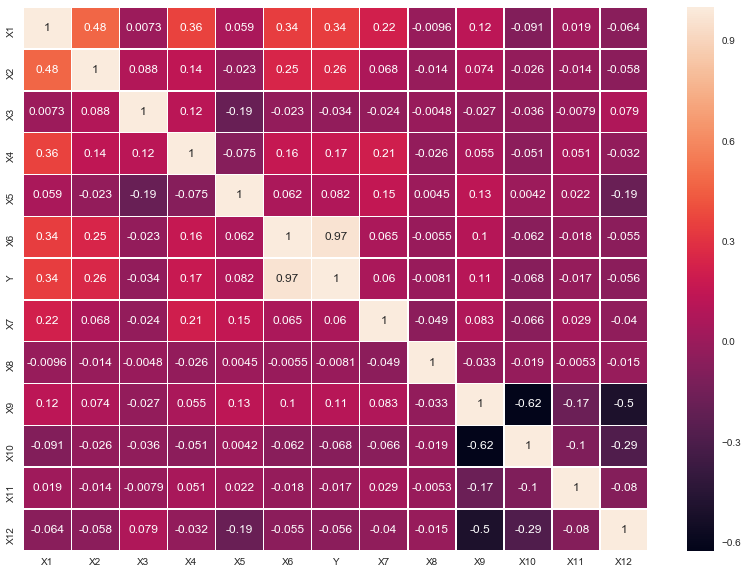

In [13]:
#Annotaed heatmap => better correlation matrix
sns.set()
f, ax = plt.subplots(figsize=(14,10))

sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

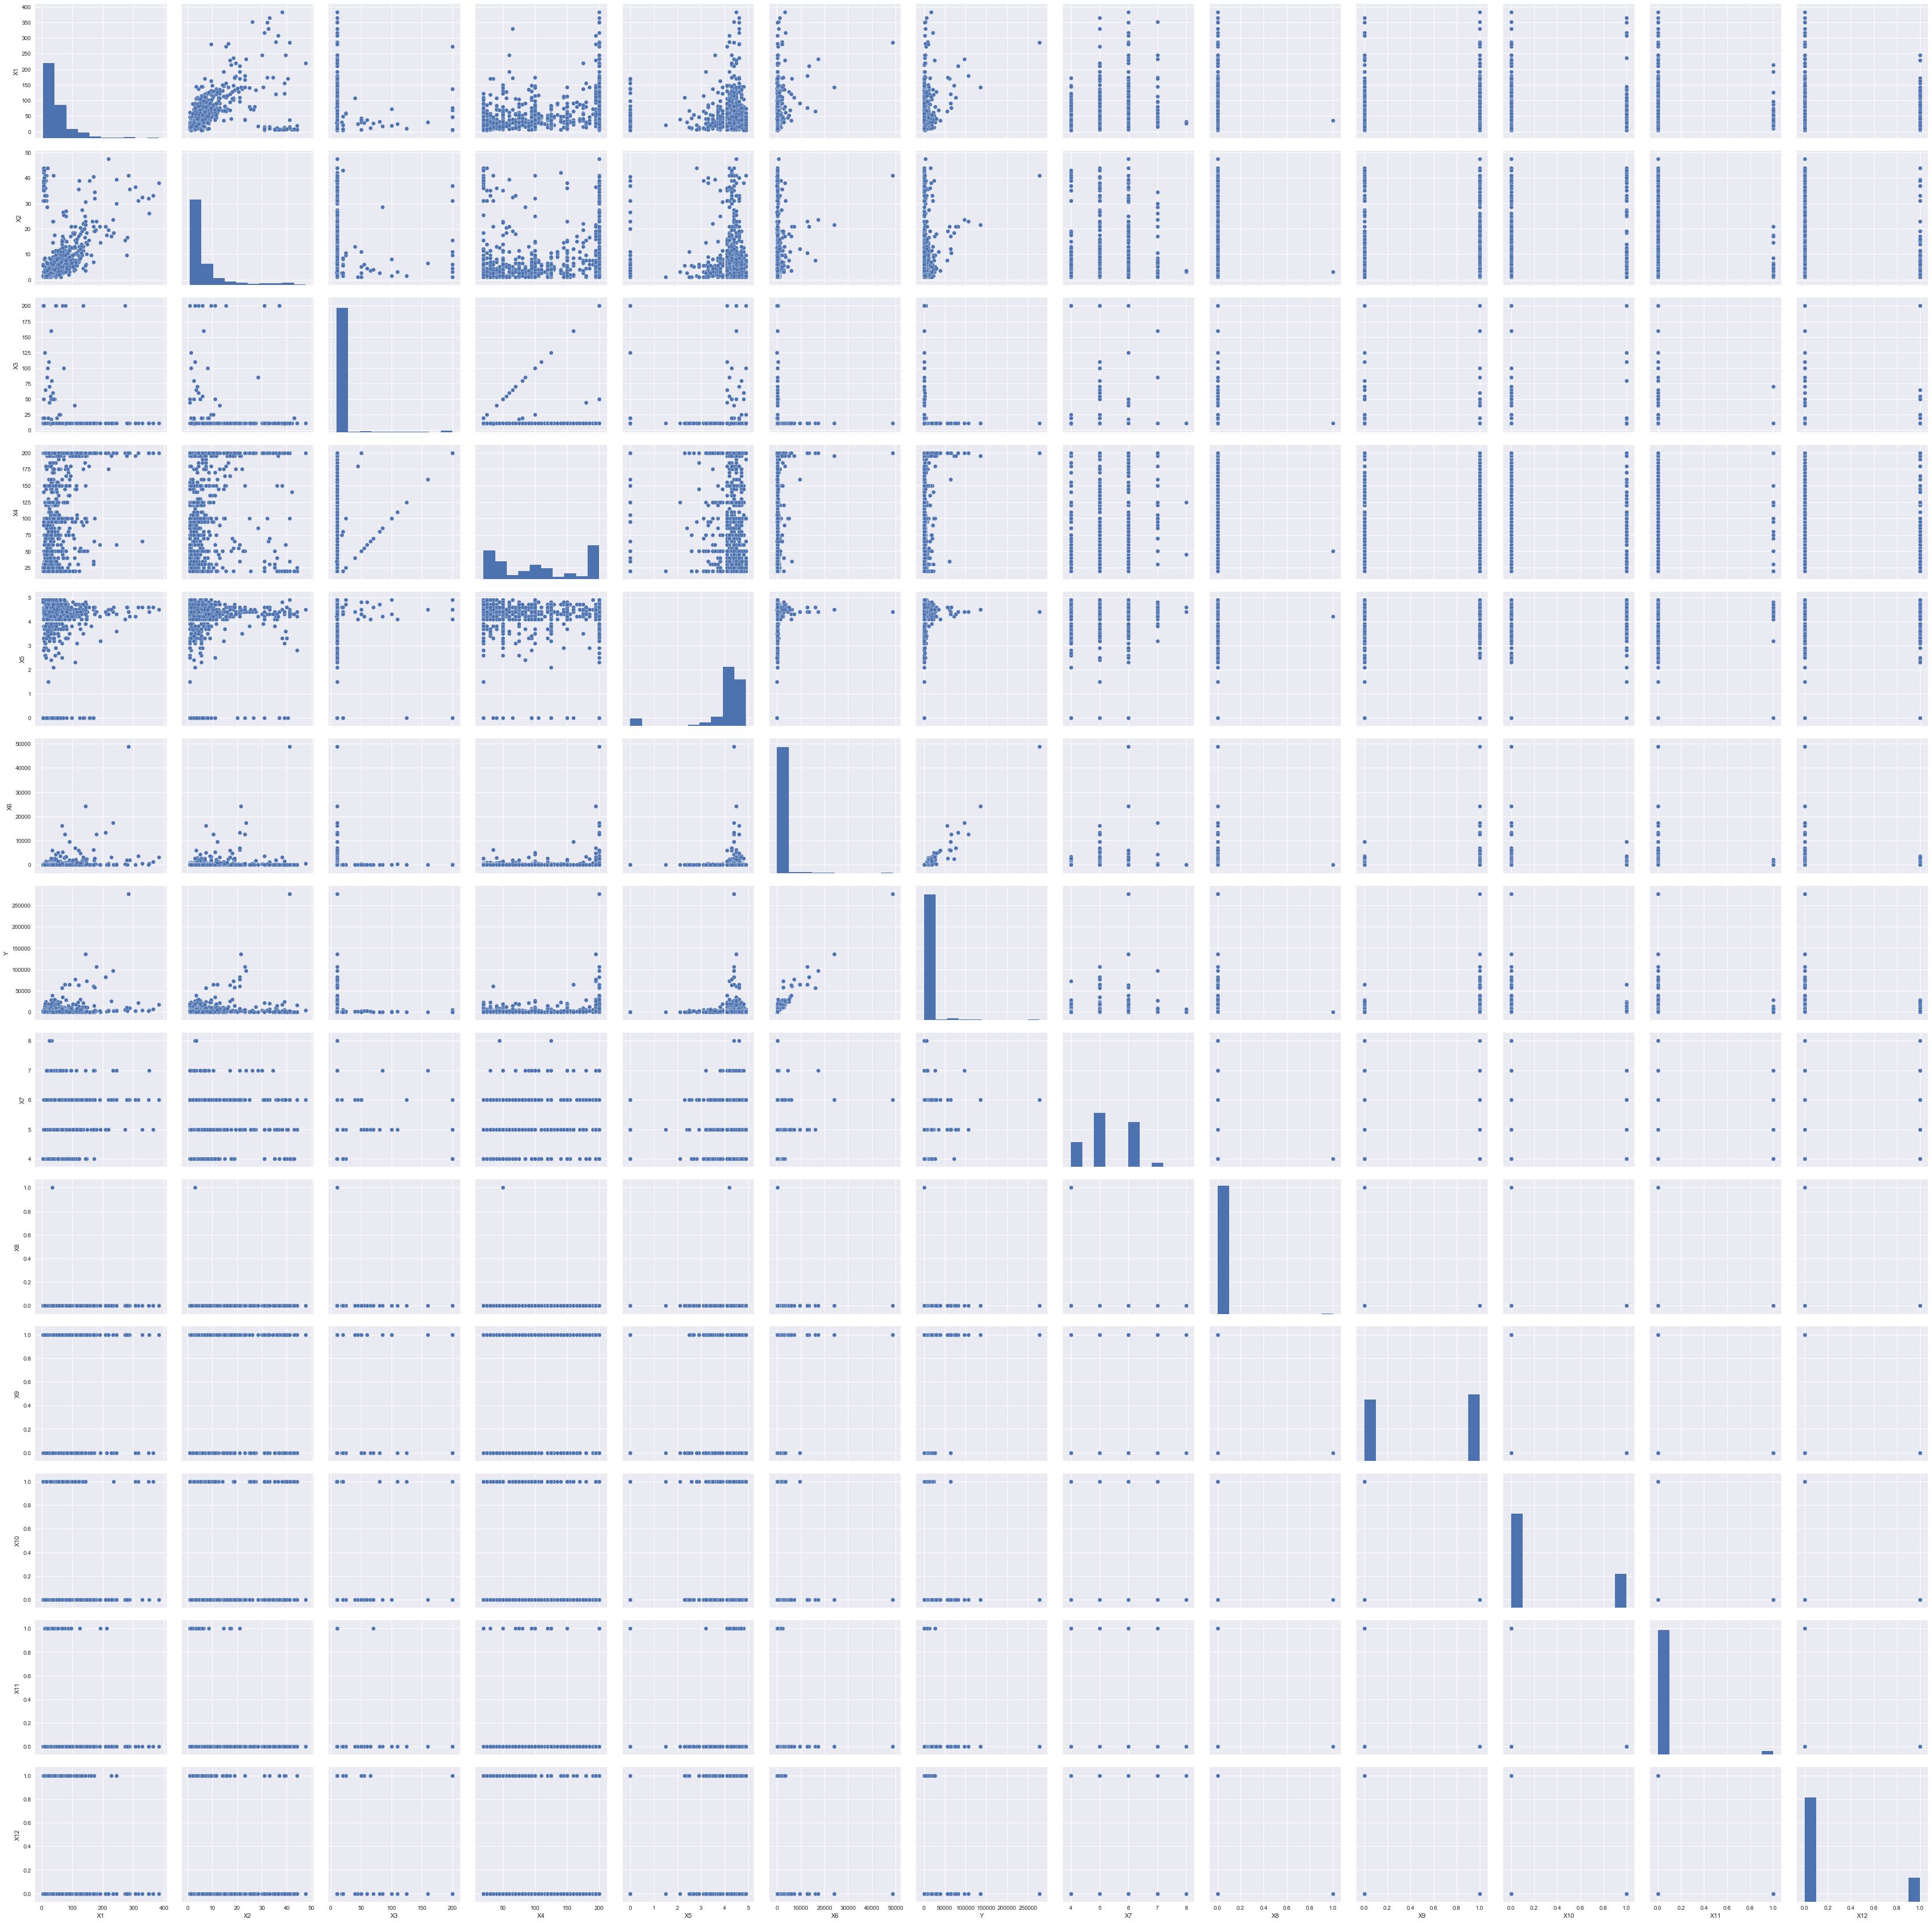

In [14]:
#plot variable to variable relationships as scatterplots
sns.pairplot(df, size = 3.6, aspect = 1);

In [15]:
y = df['Y']

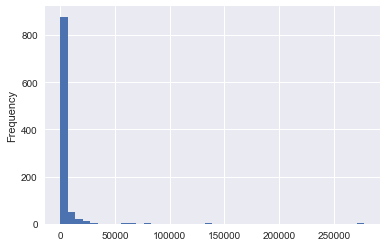

In [16]:
y.plot.hist(bins=40)

count       986.000000
mean       4327.804260
std       16754.186935
min           0.000000
25%         149.250000
50%         861.000000
75%        2598.000000
max      277764.000000
Name: Y, dtype: float64

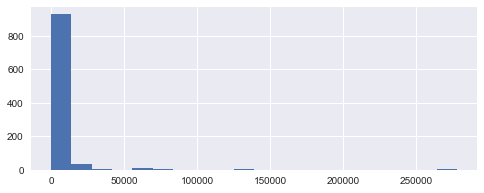

In [17]:
#Enrollment, no transformation
plt.figure(figsize=(8,3))
plt.hist(df.Y,bins=20)
df['Y'].describe()

In [18]:
df[df['Y']==277764]

,X1,X2,X3,X4,X5,X6,Y,X7,X8,X9,X10,X11,X12
646,285,41.0,10.99,199.99,4.4,48745,277764,6,0,1,0,0,0


In [19]:
udemy_df[udemy_df['Enrollment']==277764]

,Title,Lectures,Hours,Level,Sale,Price,Stars,Number of Ratings,URL,Enrollment,Incentives,,All Levels,Beginner,Expert,Intermediate
646,Machine Learning A-Z™: Hands-On Python & R In ...,285,41.0,All Levels,10.99,199.99,4.4,48745,/machinelearning/,277764,6,0,1,0,0,0


#### Normalization

Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.
This assumption is the base of the Vector Space Model often used in text classification and clustering contexts.
The preprocessing module further provides a utility class Normalizer that implements the same operation using the Transformer API (even though the fit method is useless in this case: the class is stateless as this operation treats samples independently).
This class is hence suitable for use in the early steps of a sklearn.pipeline.Pipeline:

In [20]:
y = df['Y']
X = df.drop(columns=['Y'])

In [21]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)
y_log=transformer.transform([y])
# # y_train_log = y_train_log.reshape(-1,1)
y_log_df = pd.DataFrame(y_log)

,0,1,2,3,4,5,6,7,8,9,...,976,977,978,979,980,981,982,983,984,985
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,4.343805,4.442651,6.284134,4.787492,7.912057,3.610918,7.681099,5.356586,5.370638,2.833213,...,5.472271,6.426488,6.82546,7.347944,5.411646,7.902118,7.771489,4.624973,7.389564,5.971262
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.343805,4.442651,6.284134,4.787492,7.912057,3.610918,7.681099,5.356586,5.370638,2.833213,...,5.472271,6.426488,6.82546,7.347944,5.411646,7.902118,7.771489,4.624973,7.389564,5.971262
25%,4.343805,4.442651,6.284134,4.787492,7.912057,3.610918,7.681099,5.356586,5.370638,2.833213,...,5.472271,6.426488,6.82546,7.347944,5.411646,7.902118,7.771489,4.624973,7.389564,5.971262
50%,4.343805,4.442651,6.284134,4.787492,7.912057,3.610918,7.681099,5.356586,5.370638,2.833213,...,5.472271,6.426488,6.82546,7.347944,5.411646,7.902118,7.771489,4.624973,7.389564,5.971262
75%,4.343805,4.442651,6.284134,4.787492,7.912057,3.610918,7.681099,5.356586,5.370638,2.833213,...,5.472271,6.426488,6.82546,7.347944,5.411646,7.902118,7.771489,4.624973,7.389564,5.971262
max,4.343805,4.442651,6.284134,4.787492,7.912057,3.610918,7.681099,5.356586,5.370638,2.833213,...,5.472271,6.426488,6.82546,7.347944,5.411646,7.902118,7.771489,4.624973,7.389564,5.971262


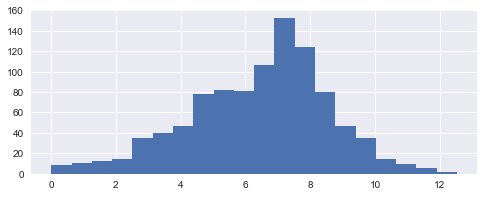

In [22]:
plt.figure(figsize=(8,3))
plt.hist(y_log_df,bins=20)
y_log_df.describe()

In [23]:
# from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)
df_log=transformer.transform(df)
# # y_train_log = y_train_log.reshape(-1,1)
log_df = pd.DataFrame(df_log)

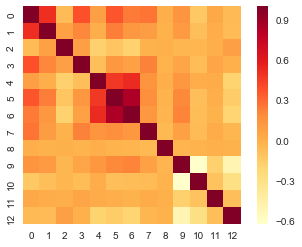

In [24]:
sns.heatmap(log_df.corr(), square=True, cmap='YlOrRd')

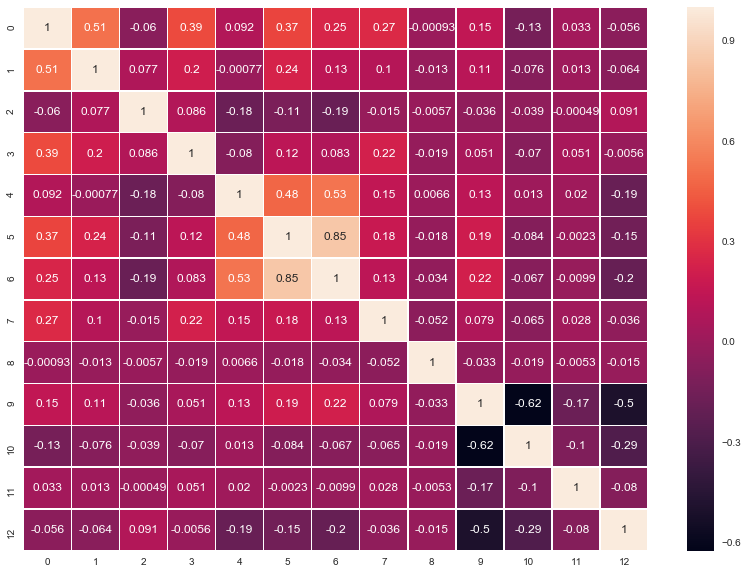

In [25]:
#Annotaed heatmap => better correlation matrix
sns.set()
f, ax = plt.subplots(figsize=(14,10))

sns.heatmap(log_df.corr(), annot=True, linewidths=.5, ax=ax)

#### OLS WITH Stasmodels

$$
\widehat{Y} = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5 + \beta_6X_6 + \beta_7X_7 + \beta_8X_8 + \beta_9X_9 + \beta_{10}X_{10}+ \beta_{11}X_{11} + \beta_{12}X_{12} 
$$

In [26]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10 + X11 + X12', data=df, return_type="dataframe")
# implicitly add the beta constatnt term 
# patsy is the interpreter to read the string | and creates the column of 1s for the constant term in the matrix]
# Create your model
model = sm.OLS(y,X) # for statsmodels 
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

#######
#y, X = patsy.dmatrices('Y ~ X1 + X2 + X3 + X4 + X5 + X6', data=df, return_type="dataframe")
#statsmodels -> better than scikit learn for linear reg
# df -> degree of freedom : no of predictors

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     1264.
Date:                Mon, 23 Jul 2018   Prob (F-statistic):               0.00
Time:                        12:44:58   Log-Likelihood:                -9644.7
No. Observations:                 986   AIC:                         1.931e+04
Df Residuals:                     974   BIC:                         1.937e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    277.1033   1095.141      0.253      0.800   -1872.003    2426.210
X1             0.0257      3.501      0.007      0.994      -6.844       6.895
X2            35.5506     18.239      1.949      0.052      -0.242      71.344
X3            -9.2906      6.713     -1.384      0.167     -22.463       3.882
X4             5.3016      2.227      2.381      0.017       0.931       9.672
X5           370.8943    132.509      2.799      0.005     110.859     630.930
X6             5.7097      0.053    108.382      0.000       5.606       5.813
X7          -256.7201    179.671     -1.429      0.153    -609.306      95.866
X8         -1086.9694   3598.035     -0.302      0.763   -8147.763    5973.824
X9           485.5511    782.217      0.621      0.535   -1049.473    2020.575
X10          147.4364    789.882      0.187      0.852   -1402.631    1697.504
X11          241.5318   1026.580      0.235      0.814   -1773.032    2256.095
X12          489.5535    800.753      0.611      0.541   -1081.846    2060.953
==============================================================================
Omnibus:                     1037.333   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           123703.053
Skew:                           4.715   Prob(JB):                         0.00
Kurtosis:                      57.056   Cond. No.                     1.10e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.66e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### Residual Plot

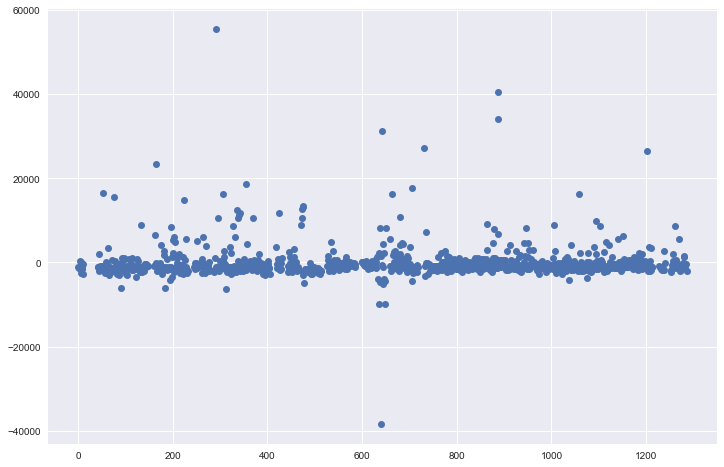

In [27]:
fit.resid.plot(style='o', figsize=(12,8));

In [28]:
#test-train split

##### Conclusion

Motivation: Need a way to choose between machine learning models
Goal is to estimate likely performance of a model on out-of-sample data
Initial idea: Train and test on the same data
But, maximizing training accuracy rewards overly complex models which overfit the training data


As you probably guessed, the problem with our model above was that we trained and tested our model on the same dataset. This means our model could be very likely to overfit and not perform as well when it tries to generalize to real world data, and after all generalization is the key to machine learning.
Thus, we have a need for cross-validation in our model evaluation process. That is, we need to find a way to train our model on 1 randomly chosen set of data and evaluate it against a separate random test set. Thankfully sklearn provides a bevy of built-in ways to perform cross-validation.

In [29]:
#Test-train split

In [30]:
whole_train,whole_test = train_test_split(log_df, test_size=0.3)

In [31]:
whole_train.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
711,3.806662,2.251292,2.484073,4.394326,1.722767,4.499810,8.260493,1.945910,0.0,0.693147,0.0,0.0,0.0
547,3.218876,1.609438,2.484073,3.931630,1.667707,3.044522,6.936343,1.791759,0.0,0.693147,0.0,0.0,0.0


In [32]:
whole_train.columns

RangeIndex(start=0, stop=13, step=1)

In [33]:
whole_train=whole_train.rename(columns={7:'Y' ,1:'X1',2:'X2',3:'X3',4:'X4',5:'X5', 6:'X6',8:'X8',9:'X9',10:'X10',11:'X11',12:'X12' })

In [34]:
whole_train.head()

,0,X1,X2,X3,X4,X5,X6,Y,X8,X9,X10,X11,X12
711,3.806662,2.251292,2.484073,4.394326,1.722767,4.499810,8.260493,1.945910,0.0,0.693147,0.000000,0.0,0.000000
547,3.218876,1.609438,2.484073,3.931630,1.667707,3.044522,6.936343,1.791759,0.0,0.693147,0.000000,0.0,0.000000
49,2.995732,0.916291,2.484073,4.330602,1.629241,2.944439,5.043425,1.791759,0.0,0.000000,0.693147,0.0,0.000000
712,3.332205,1.098612,2.484073,4.836203,1.740466,1.098612,3.091042,1.609438,0.0,0.000000,0.000000,0.0,0.693147
724,3.931826,2.484907,2.484073,3.931630,1.629241,4.317488,9.228770,1.791759,0.0,0.000000,0.000000,0.0,0.693147


In [35]:
df.head()

,X1,X2,X3,X4,X5,X6,Y,X7,X8,X9,X10,X11,X12
0,61,11.5,10.99,19.99,4.7,12,76,6,0,0,1,0,0
1,24,2.5,10.99,49.99,4.4,18,84,5,0,0,0,0,1
2,44,2.5,10.99,199.99,4.5,24,535,6,0,0,1,0,0
3,11,1.0,10.99,49.99,4.3,37,119,6,0,1,0,0,0
4,60,6.5,10.99,174.99,4.7,39,2729,5,0,1,0,0,0


In [36]:
whole_train=whole_train.rename(columns={7:'Y' ,1:'X1',2:'X2',3:'X3',4:'X4',5:'X5', 6:'X6',8:'X8',9:'X9',10:'X10',11:'X11',12:'X12' })

In [37]:

# Create your feature matrix (X) and target vector (y)
y_log_train, X_log_train = patsy.dmatrices('Y ~ X1 + X2 + X3 + X4 + X5 + X6  + X8 + X9 + X10 + X11 + X12', data=whole_train, return_type="dataframe")
# implicitly add the beta constatnt term 
# patsy is the interpreter to read the string | and creates the column of 1s for the constant term in the matrix]
# Create your model
# y_train_log = np.log(y_train)

# from sklearn.preprocessing import FunctionTransformer
# transformer = FunctionTransformer(np.log1p)
# y_train_log=transformer.transform(y_train)
# # y_train_log = y_train_log.reshape(-1,1)
# y_train_log_df = pd.DataFrame(y_train_log)

model = sm.OLS(y_log_train,X_log_train) # for statsmodels 
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

#######
#y, X = patsy.dmatrices('Y ~ X1 + X2 + X3 + X4 + X5 + X6', data=df, return_type="dataframe")
#statsmodels -> better than scikit learn for linear reg
# df -> degree of freedom : no of predictors

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     7.210
Date:                Mon, 23 Jul 2018   Prob (F-statistic):           4.83e-10
Time:                        12:45:17   Log-Likelihood:                 489.13
No. Observations:                 690   AIC:                            -958.3
Df Residuals:                     680   BIC:                            -912.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4488      0.045     32.150      0.000       1.360       1.537
X1             0.0055      0.006      0.861      0.390      -0.007       0.018
X2            -0.0009      0.013     -0.069      0.945      -0.026       0.024
X3             0.0339      0.006      5.711      0.000       0.022       0.046
X4             0.0363      0.014      2.618      0.009       0.009       0.064
X5             0.0129      0.004      2.923      0.004       0.004       0.022
X6            -0.0090      0.004     -2.170      0.030      -0.017      -0.001
X8         -6.864e-17      1e-17     -6.848      0.000   -8.83e-17    -4.9e-17
X9             0.2525      0.015     17.014      0.000       0.223       0.282
X10            0.2466      0.015     16.302      0.000       0.217       0.276
X11            0.2456      0.030      8.055      0.000       0.186       0.305
X12            0.2595      0.017     15.535      0.000       0.227       0.292
==============================================================================
Omnibus:                       21.761   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.540
Skew:                          -0.307   Prob(JB):                     0.000155
Kurtosis:                       2.517   Cond. No.                     3.91e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.17e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

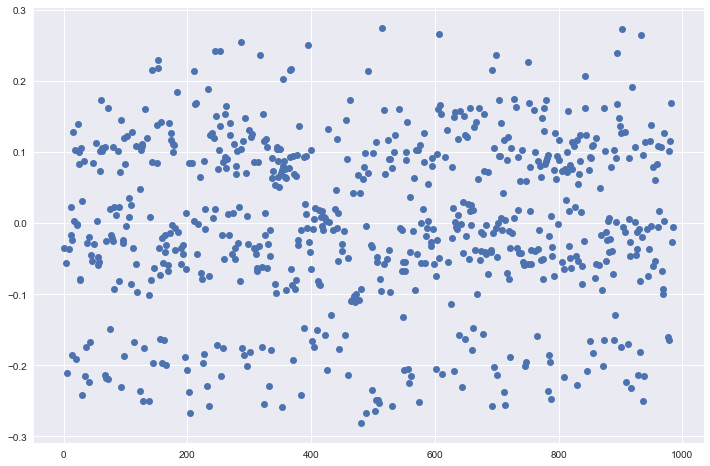

In [38]:
fit.resid.plot(style='o', figsize=(12,8));

In [39]:
from sklearn.cross_validation import cross_val_score
# 10-fold cross-validation with our  data
reg = LinearRegression()
scores = cross_val_score(reg, X, y, cv=10, scoring='mean_squared_error')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print(-scores)

[9.16390885e+06 1.35333322e+07 4.95667841e+07 1.27193824e+07
 6.40811274e+08 1.51176234e+07 3.25502302e+07 3.99966068e+06
 7.37357745e+06 1.05181110e+07]


/Users/codess/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/codess/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/codess/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/codess/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


---------------------------------------

In [40]:
#Test Train Split

y=whole_train['Y']
X=whole_train.drop(['Y', 'X1', 'X2', 'X8'],1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


X_scaler = preprocessing.StandardScaler(copy=False).fit(X_train)
X_train = X_scaler.transform(X_train)
X_test=X_scaler.transform(X_test)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

y_train=pd.DataFrame(y_train,columns=['Y'])
y_test=pd.DataFrame(y_test,columns=['Y'])

In [41]:
#Lasso Model
param_grid = {
    'alpha': [3.46e-4, 3.47e-4, 3.48e-4, 3.49e-4, 3.50e-4, 3.51e-4],
    'max_iter': [1000, 2000, 4000]
}
lasso = Lasso()
grid = GridSearchCV(lasso, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.000346, 0.000347, 0.000348, 0.000349, 0.00035, 0.000351], 'max_iter': [1000, 2000, 4000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
grid.best_params_

{'alpha': 0.000351, 'max_iter': 1000}

In [43]:
lasso = Lasso(alpha=0.000346)
model = lasso.fit(X_train, y_train)
zipped=zip(X.columns, model.coef_)
features=sorted(zipped,key = lambda t: t[1],reverse=True)
features

[(0, 0.023300649310615124),
 ('X3', 0.01826484038834703),
 ('X5', 0.010606233041113735),
 ('X4', 0.007126857583753784),
 ('X10', 0.0011242552360432585),
 ('X12', 0.0),
 ('X9', -0.0008922090810037191),
 ('X11', -0.0033241510392560862),
 ('X6', -0.003325304089627636)]

In [44]:
model.score(X_train, y_train)

0.10167536317469583

In [45]:
mean_squared_error(y_train, model.predict(X_train))

0.0139728264868301

In [61]:
X_train.head(2)

,0,X3,X4,X5,X6,X9,X10,X11,X12
0,-2.298130,1.163244,-3.883696,-1.825464,-2.884839,0.937751,-0.584523,-0.15266,-0.481812
1,1.859973,1.030882,0.381361,-0.077188,-0.301120,-1.066381,-0.584523,-0.15266,2.075498


In [63]:
y_train.head(2)

,Y
630,1.609438
351,1.945910
